In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

from google.colab import files

### Функция медианного фильтра

In [17]:
def median_filter_native(img, ksize):
    pad = ksize // 2
    h, w, c = img.shape
    out = np.zeros_like(img)

    # создаём массив нужного размера
    padded = np.zeros((h + 2*pad, w + 2*pad, c), dtype=img.dtype)

    # центральная часть (оригинал)
    padded[pad:pad+h, pad:pad+w] = img

    # отражение сверху и снизу
    for i in range(pad):
        padded[pad - 1 - i] = padded[pad + 1 + i]
        padded[pad + h + i] = padded[pad + h - 2 - i]

    # отражение слева и справа
    for j in range(pad):
        padded[:, pad - 1 - j] = padded[:, pad + 1 + j]
        padded[:, pad + w + j] = padded[:, pad + w - 2 - j]

    for y in range(h):
        for x in range(w):
            window = padded[y:y+ksize, x:x+ksize]
            for channel in range(c):
                vals = window[:, :, channel].flatten()
                vals.sort()
                out[y, x, channel] = vals[len(vals)//2]

    return out


In [22]:
uploaded = files.upload()

image_name = next(iter(uploaded.keys()))
print("Загружен файл:", image_name)

img = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_COLOR)

Saving 4.jpg to 4.jpg
Загружен файл: 4.jpg


### Визуализация результата

In [23]:
def visualise(img_med_cv : np.ndarray, img_med_native : np.ndarray, ksize : np.ndarray):
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_med_cv_rgb = cv2.cvtColor(img_med_cv, cv2.COLOR_BGR2RGB)
  img_med_native_rgb = cv2.cvtColor(img_med_native, cv2.COLOR_BGR2RGB)

  plt.figure(figsize=(20, 10))

  plt.subplot(1, 3, 1)
  plt.title("Исходное")
  plt.imshow(img_rgb)
  plt.axis("off")

  plt.subplot(1, 3, 2)
  plt.title(f"OpenCV, k={ksize}")
  plt.imshow(img_med_cv_rgb)
  plt.axis("off")

  plt.subplot(1, 3, 3)
  plt.title(f"Нативно, k={ksize}")
  plt.imshow(img_med_native_rgb)
  plt.axis("off")

  plt.show()

### Cравнение по нескольким размерам ядра

In [24]:
def process(ksize : int):
  print(f"Размер ядра медианного фильтра: {ksize}x{ksize}")

  # OpenCV
  start = time.perf_counter()
  img_med_cv = cv2.medianBlur(img, ksize)
  t_cv = time.perf_counter() - start
  print(f"Время фильтрации (OpenCV): {t_cv:.6f} с")

  # Нативная реализация
  start = time.perf_counter()
  img_med_native = median_filter_native(img, ksize)
  t_native = time.perf_counter() - start
  print(f"Время фильтрации (нативный Python): {t_native:.6f} с")

  speedup = t_native / t_cv if t_cv > 0 else float('inf')
  print(f"OpenCV быстрее нативной реализации примерно в {speedup:.2f} раз")

  visualise(img_med_cv, img_med_native, ksize)

Размер ядра медианного фильтра: 5x5
Время фильтрации (OpenCV): 0.018911 с
Время фильтрации (нативный Python): 27.592765 с
OpenCV быстрее нативной реализации примерно в 1459.08 раз


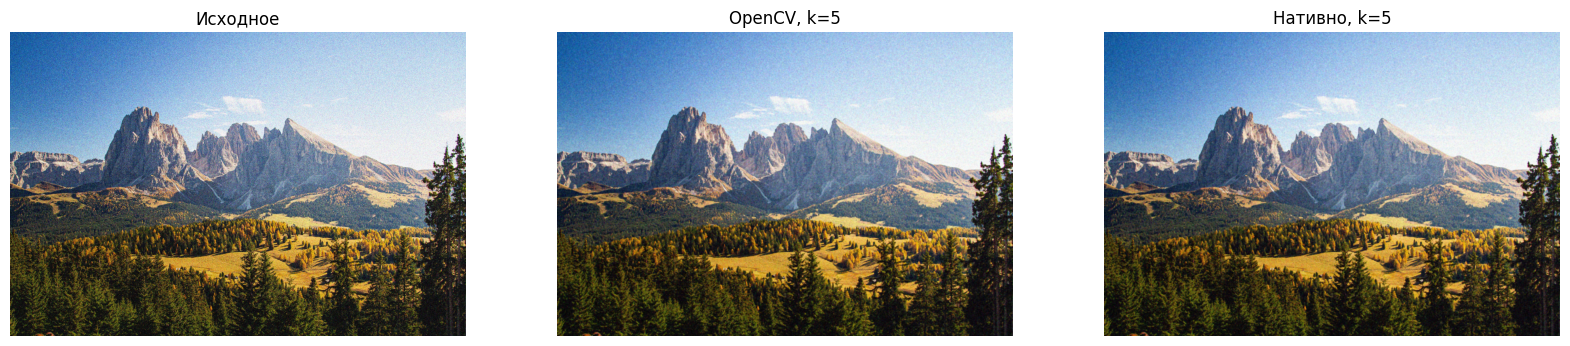

Размер ядра медианного фильтра: 9x9
Время фильтрации (OpenCV): 0.575146 с
Время фильтрации (нативный Python): 46.658554 с
OpenCV быстрее нативной реализации примерно в 81.12 раз


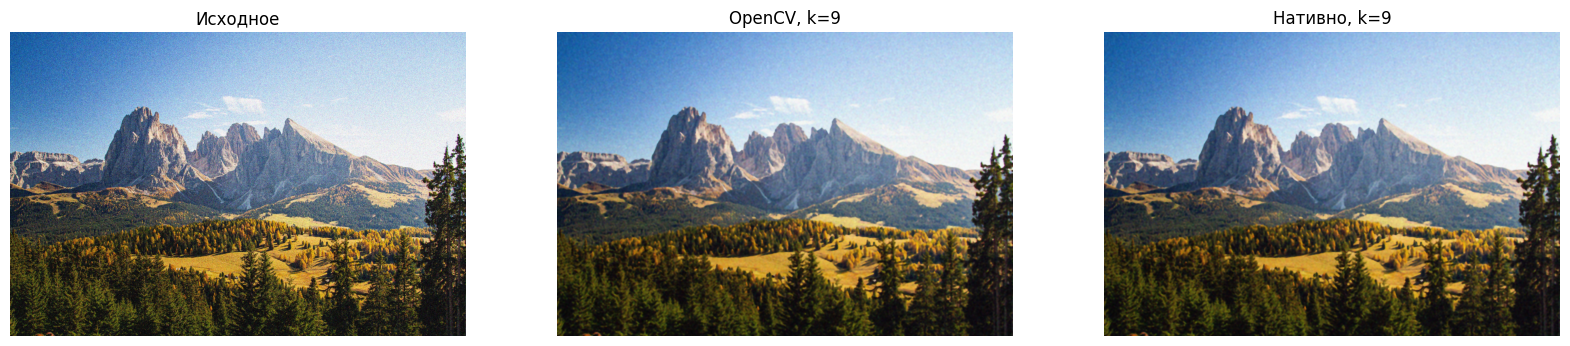

Размер ядра медианного фильтра: 13x13
Время фильтрации (OpenCV): 0.441646 с
Время фильтрации (нативный Python): 79.161108 с
OpenCV быстрее нативной реализации примерно в 179.24 раз


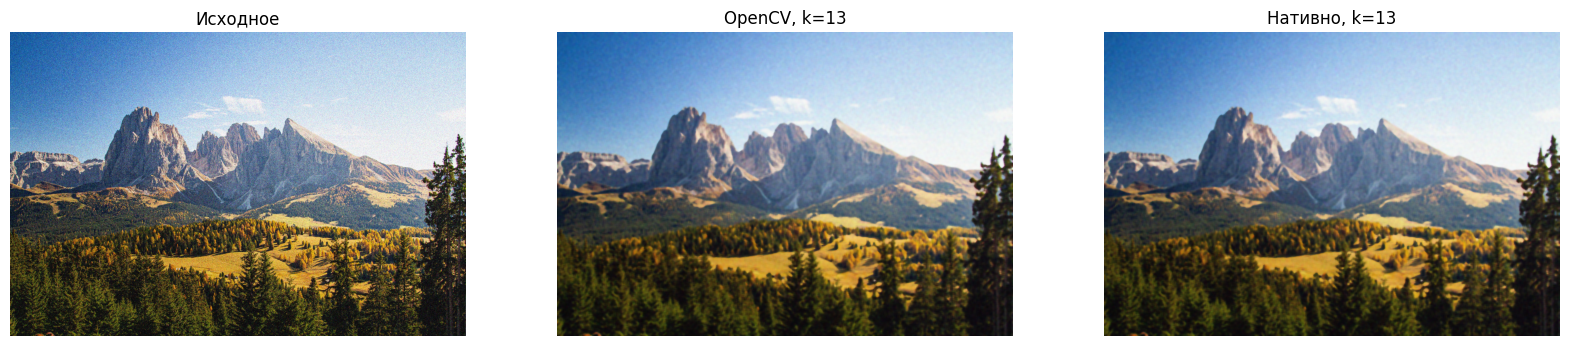

Размер ядра медианного фильтра: 17x17
Время фильтрации (OpenCV): 0.417865 с
Время фильтрации (нативный Python): 127.819457 с
OpenCV быстрее нативной реализации примерно в 305.89 раз


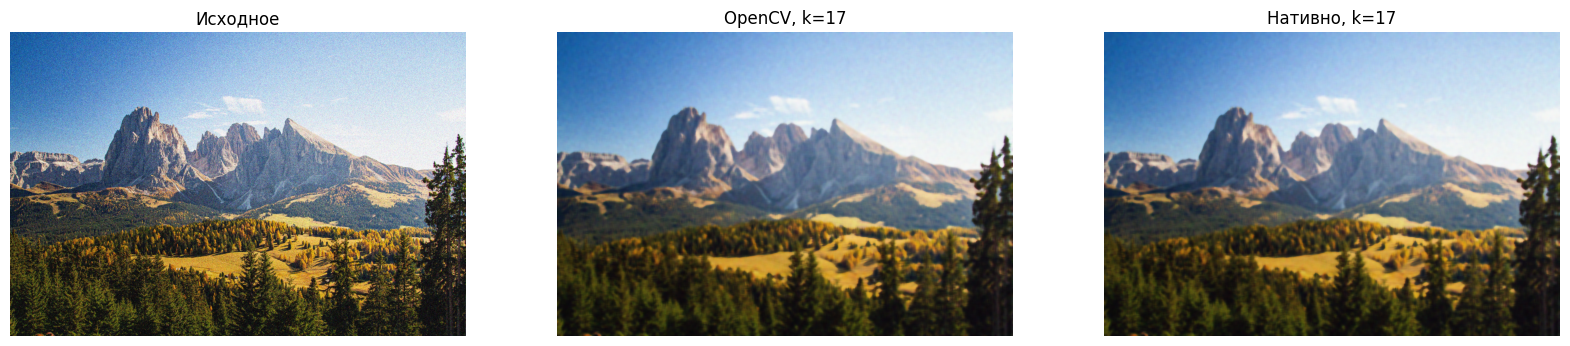

In [26]:
process(5)
process(9)
process(13)
process(17)